In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
tf.random.set_seed(333)



2.1.0


In [2]:
XY = np.array(
    [
        [828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998],
    ]
)

x_train = XY[:, 0:-1]
y_train = XY[:, -1]
x_train, y_train

(array([[8.28659973e+02, 8.33450012e+02, 9.08100000e+05, 8.28349976e+02],
        [8.23020020e+02, 8.28070007e+02, 1.82810000e+06, 8.21655029e+02],
        [8.19929993e+02, 8.24400024e+02, 1.43810000e+06, 8.18979980e+02],
        [8.16000000e+02, 8.20958984e+02, 1.00810000e+06, 8.15489990e+02],
        [8.19359985e+02, 8.23000000e+02, 1.18810000e+06, 8.18469971e+02],
        [8.19000000e+02, 8.23000000e+02, 1.19810000e+06, 8.16000000e+02],
        [8.11700012e+02, 8.15250000e+02, 1.09810000e+06, 8.09780029e+02],
        [8.09510010e+02, 8.16659973e+02, 1.39810000e+06, 8.04539978e+02]]),
 array([831.659973, 828.070007, 824.159973, 819.23999 , 818.97998 ,
        820.450012, 813.669983, 809.559998]))

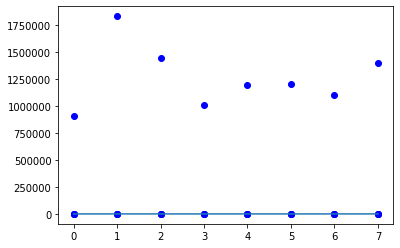

In [3]:
plt.plot(x_train, "bo")
plt.plot(y_train)



[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


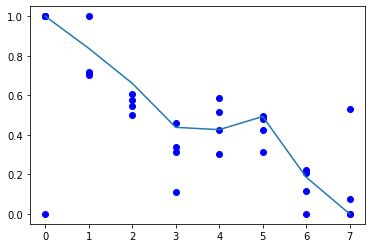

In [4]:
# 최대 최솟값은 열 끼리 비교하므로 axis=0 값 주어줌
def normalization(XY):
    num = XY - np.min(XY, axis=0)
    return num / (np.max(XY, 0) - np.min(XY, 0))


XY = normalization(XY)
print(XY)
x_train = XY[:, 0:-1]
y_train = XY[:, -1]
plt.plot(x_train, "bo")
plt.plot(y_train)
plt.show()

# batch -> 8
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
W = tf.Variable(tf.random.normal((4, 4)))
b = tf.Variable(tf.random.normal((4,)))

In [5]:


def linearReg_fn(X):
    return np.matmul(X, W) + b


def l2_loss(cost, beta=0.01):
    W_reg = tf.nn.l2_loss(W)
    loss = tf.reduce_mean(cost + W_reg * beta)
    return loss


def loss_fn(X, label, flag):
    cost = tf.reduce_mean(tf.square(linearReg_fn(X) - label))
    if flag:
        cost = l2_loss(cost)
    return cost



In [6]:
is_decay = True
starter_learning_rate = 0.01

if is_decay:
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=starter_learning_rate,
        decay_steps=50,
        decay_rate=0.96,
        staircase=False,
    )
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(starter_learning_rate)


def grad(features, labels, flag):
    with tf.GradientTape() as tape:
        loss_val = loss_fn(linearReg_fn(features), labels, flag)
    return tape.gradient(loss_val, [W, b]), loss_val


# dateset 의 피쳐와 라벨은 무엇인지?
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
    if step % 10 == 0:
        print("Iter: {}, Loss: {:.4f}".format(step, loss_value))


ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [7]:


def linearReg_fn(X):
    return tf.matmul(X, W) + b


def l2_loss(cost, beta=0.01):
    W_reg = tf.nn.l2_loss(W)
    loss = tf.reduce_mean(cost + W_reg * beta)
    return loss


def loss_fn(X, label, flag):
    cost = tf.reduce_mean(tf.square(linearReg_fn(X) - label))
    if flag:
        cost = l2_loss(cost)
    return cost



In [8]:
is_decay = True
starter_learning_rate = 0.01

if is_decay:
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=starter_learning_rate,
        decay_steps=50,
        decay_rate=0.96,
        staircase=False,
    )
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(starter_learning_rate)


def grad(features, labels, flag):
    with tf.GradientTape() as tape:
        loss_val = loss_fn(linearReg_fn(features), labels, flag)
    return tape.gradient(loss_val, [W, b]), loss_val


# dateset 의 피쳐와 라벨은 무엇인지?
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
    if step % 10 == 0:
        print("Iter: {}, Loss: {:.4f}".format(step, loss_value))


InvalidArgumentError: Incompatible shapes: [8,4] vs. [8] [Op:Sub] name: sub/

[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


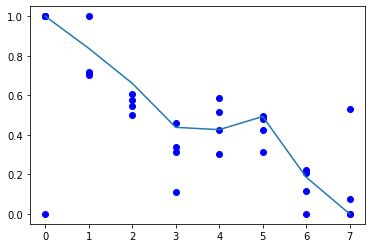

In [9]:
# 최대 최솟값은 열 끼리 비교하므로 axis=0 값 주어줌
def normalization(XY):
    num = XY - np.min(XY, axis=0)
    return num / (np.max(XY, 0) - np.min(XY, 0))


XY = normalization(XY)
print(XY)
x_train = XY[:, 0:-1]
y_train = XY[:, [-1]]
plt.plot(x_train, "bo")
plt.plot(y_train)
plt.show()

# batch -> 8
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
W = tf.Variable(tf.random.normal((4, 4)))
b = tf.Variable(tf.random.normal((4,)))

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
tf.random.set_seed(333)



2.1.0


In [2]:
XY = np.array(
    [
        [828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998],
    ]
)

x_train = XY[:, 0:-1]
y_train = XY[:, -1]
x_train, y_train

(array([[8.28659973e+02, 8.33450012e+02, 9.08100000e+05, 8.28349976e+02],
        [8.23020020e+02, 8.28070007e+02, 1.82810000e+06, 8.21655029e+02],
        [8.19929993e+02, 8.24400024e+02, 1.43810000e+06, 8.18979980e+02],
        [8.16000000e+02, 8.20958984e+02, 1.00810000e+06, 8.15489990e+02],
        [8.19359985e+02, 8.23000000e+02, 1.18810000e+06, 8.18469971e+02],
        [8.19000000e+02, 8.23000000e+02, 1.19810000e+06, 8.16000000e+02],
        [8.11700012e+02, 8.15250000e+02, 1.09810000e+06, 8.09780029e+02],
        [8.09510010e+02, 8.16659973e+02, 1.39810000e+06, 8.04539978e+02]]),
 array([831.659973, 828.070007, 824.159973, 819.23999 , 818.97998 ,
        820.450012, 813.669983, 809.559998]))

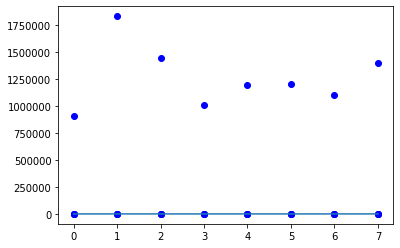

In [3]:
plt.plot(x_train, "bo")
plt.plot(y_train)



[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


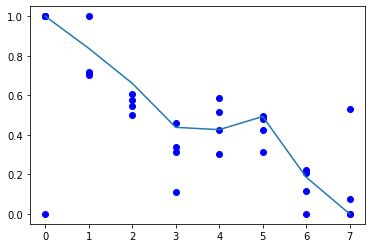

In [4]:
# 최대 최솟값은 열 끼리 비교하므로 axis=0 값 주어줌
def normalization(XY):
    num = XY - np.min(XY, axis=0)
    return num / (np.max(XY, 0) - np.min(XY, 0))


XY = normalization(XY)
print(XY)
x_train = XY[:, 0:-1]
y_train = XY[:, [-1]]
plt.plot(x_train, "bo")
plt.plot(y_train)
plt.show()

# batch -> 8
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
W = tf.Variable(tf.random.normal((4, 4)))
b = tf.Variable(tf.random.normal((4,)))

In [5]:


def linearReg_fn(X):
    return tf.matmul(X, W) + b


def l2_loss(cost, beta=0.01):
    W_reg = tf.nn.l2_loss(W)
    loss = tf.reduce_mean(cost + W_reg * beta)
    return loss


def loss_fn(X, label, flag):
    cost = tf.reduce_mean(tf.square(linearReg_fn(X) - label))
    if flag:
        cost = l2_loss(cost)
    return cost



In [6]:
is_decay = True
starter_learning_rate = 0.01

if is_decay:
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=starter_learning_rate,
        decay_steps=50,
        decay_rate=0.96,
        staircase=False,
    )
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(starter_learning_rate)


def grad(features, labels, flag):
    with tf.GradientTape() as tape:
        loss_val = loss_fn(linearReg_fn(features), labels, flag)
    return tape.gradient(loss_val, [W, b]), loss_val


# dateset 의 피쳐와 라벨은 무엇인지?
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
    if step % 10 == 0:
        print("Iter: {}, Loss: {:.4f}".format(step, loss_value))



Iter: 0, Loss: 1.6861
Iter: 10, Loss: 0.9842
Iter: 20, Loss: 0.7399
Iter: 30, Loss: 0.6022
Iter: 40, Loss: 0.5052
Iter: 50, Loss: 0.4311
Iter: 60, Loss: 0.3725
Iter: 70, Loss: 0.3253
Iter: 80, Loss: 0.2869
Iter: 90, Loss: 0.2553
Iter: 100, Loss: 0.2290


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
tf.random.set_seed(333)



2.1.0


In [2]:
XY = np.array(
    [
        [828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998],
    ]
)

x_train = XY[:, 0:-1]
y_train = XY[:, -1]
x_train, y_train

(array([[8.28659973e+02, 8.33450012e+02, 9.08100000e+05, 8.28349976e+02],
        [8.23020020e+02, 8.28070007e+02, 1.82810000e+06, 8.21655029e+02],
        [8.19929993e+02, 8.24400024e+02, 1.43810000e+06, 8.18979980e+02],
        [8.16000000e+02, 8.20958984e+02, 1.00810000e+06, 8.15489990e+02],
        [8.19359985e+02, 8.23000000e+02, 1.18810000e+06, 8.18469971e+02],
        [8.19000000e+02, 8.23000000e+02, 1.19810000e+06, 8.16000000e+02],
        [8.11700012e+02, 8.15250000e+02, 1.09810000e+06, 8.09780029e+02],
        [8.09510010e+02, 8.16659973e+02, 1.39810000e+06, 8.04539978e+02]]),
 array([831.659973, 828.070007, 824.159973, 819.23999 , 818.97998 ,
        820.450012, 813.669983, 809.559998]))

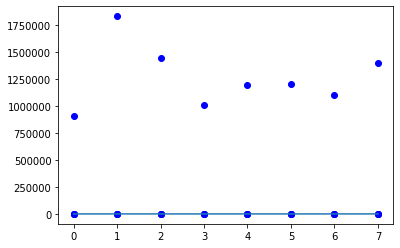

In [3]:
plt.plot(x_train, "bo")
plt.plot(y_train)



[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


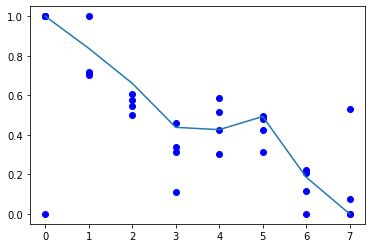

In [4]:
# 최대 최솟값은 열 끼리 비교하므로 axis=0 값 주어줌
def normalization(XY):
    num = XY - np.min(XY, axis=0)
    return num / (np.max(XY, 0) - np.min(XY, 0))


XY = normalization(XY)
print(XY)
x_train = XY[:, 0:-1]
y_train = XY[:, [-1]]
plt.plot(x_train, "bo")
plt.plot(y_train)
plt.show()

# batch -> 8
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
W = tf.Variable(tf.random.normal((4, 4)))
b = tf.Variable(tf.random.normal((4,)))

In [5]:


def linearReg_fn(X):
    return tf.matmul(X, W) + b


def l2_loss(cost, beta=0.01):
    W_reg = tf.nn.l2_loss(W)
    loss = tf.reduce_mean(cost + W_reg * beta)
    return loss


def loss_fn(X, label, flag):
    cost = tf.reduce_mean(tf.square(linearReg_fn(X) - label))
    if flag:
        cost = l2_loss(cost)
    return cost



In [6]:
is_decay = True
starter_learning_rate = 0.01

if is_decay:
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=starter_learning_rate,
        decay_steps=50,
        decay_rate=0.96,
        staircase=True,
    )
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(starter_learning_rate)


def grad(features, labels, flag):
    with tf.GradientTape() as tape:
        loss_val = loss_fn(linearReg_fn(features), labels, flag)
    return tape.gradient(loss_val, [W, b]), loss_val


# dateset 의 피쳐와 라벨은 무엇인지?
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
    if step % 10 == 0:
        print("Iter: {}, Loss: {:.4f}".format(step, loss_value))



Iter: 0, Loss: 1.6861
Iter: 10, Loss: 0.9829
Iter: 20, Loss: 0.7371
Iter: 30, Loss: 0.5981
Iter: 40, Loss: 0.4997
Iter: 50, Loss: 0.4244
Iter: 60, Loss: 0.3669
Iter: 70, Loss: 0.3202
Iter: 80, Loss: 0.2820
Iter: 90, Loss: 0.2504
Iter: 100, Loss: 0.2241


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
tf.random.set_seed(333)



2.1.0


In [2]:
XY = np.array(
    [
        [828.659973, 833.450012, 908100, 828.349976, 831.659973],
        [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
        [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
        [816, 820.958984, 1008100, 815.48999, 819.23999],
        [819.359985, 823, 1188100, 818.469971, 818.97998],
        [819, 823, 1198100, 816, 820.450012],
        [811.700012, 815.25, 1098100, 809.780029, 813.669983],
        [809.51001, 816.659973, 1398100, 804.539978, 809.559998],
    ]
)

x_train = XY[:, 0:-1]
y_train = XY[:, -1]
x_train, y_train

(array([[8.28659973e+02, 8.33450012e+02, 9.08100000e+05, 8.28349976e+02],
        [8.23020020e+02, 8.28070007e+02, 1.82810000e+06, 8.21655029e+02],
        [8.19929993e+02, 8.24400024e+02, 1.43810000e+06, 8.18979980e+02],
        [8.16000000e+02, 8.20958984e+02, 1.00810000e+06, 8.15489990e+02],
        [8.19359985e+02, 8.23000000e+02, 1.18810000e+06, 8.18469971e+02],
        [8.19000000e+02, 8.23000000e+02, 1.19810000e+06, 8.16000000e+02],
        [8.11700012e+02, 8.15250000e+02, 1.09810000e+06, 8.09780029e+02],
        [8.09510010e+02, 8.16659973e+02, 1.39810000e+06, 8.04539978e+02]]),
 array([831.659973, 828.070007, 824.159973, 819.23999 , 818.97998 ,
        820.450012, 813.669983, 809.559998]))

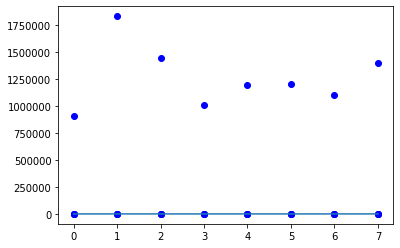

In [3]:
plt.plot(x_train, "bo")
plt.plot(y_train)



[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


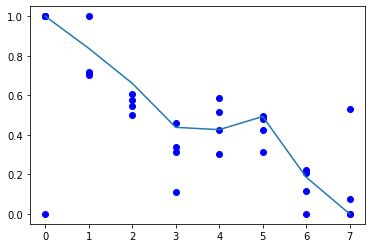

In [4]:
# 최대 최솟값은 열 끼리 비교하므로 axis=0 값 주어줌
def normalization(XY):
    num = XY - np.min(XY, axis=0)
    return num / (np.max(XY, 0) - np.min(XY, 0))


XY = normalization(XY)
print(XY)
x_train = XY[:, 0:-1]
y_train = XY[:, [-1]]
plt.plot(x_train, "bo")
plt.plot(y_train)
plt.show()

# batch -> 8
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))
W = tf.Variable(tf.random.normal((4, 4)))
b = tf.Variable(tf.random.normal((4,)))

In [5]:


def linearReg_fn(X):
    return tf.matmul(X, W) + b


def l2_loss(cost, beta=0.01):
    W_reg = tf.nn.l2_loss(W)
    loss = tf.reduce_mean(cost + W_reg * beta)
    return loss


def loss_fn(X, label, flag):
    cost = tf.reduce_mean(tf.square(linearReg_fn(X) - label))
    if flag:
        cost = l2_loss(cost)
    return cost



In [6]:
is_decay = True
starter_learning_rate = 0.1

if is_decay:
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=starter_learning_rate,
        decay_steps=50,
        decay_rate=0.96,
        staircase=True,
    )
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(starter_learning_rate)


def grad(features, labels, flag):
    with tf.GradientTape() as tape:
        loss_val = loss_fn(linearReg_fn(features), labels, flag)
    return tape.gradient(loss_val, [W, b]), loss_val


# dateset 의 피쳐와 라벨은 무엇인지?
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads, [W, b]))
    if step % 10 == 0:
        print("Iter: {}, Loss: {:.4f}".format(step, loss_value))



Iter: 0, Loss: 1.6861
Iter: 10, Loss: 0.2071
Iter: 20, Loss: 0.1001
Iter: 30, Loss: 0.0753
Iter: 40, Loss: 0.0663
Iter: 50, Loss: 0.0616
Iter: 60, Loss: 0.0585
Iter: 70, Loss: 0.0559
Iter: 80, Loss: 0.0536
Iter: 90, Loss: 0.0513
Iter: 100, Loss: 0.0490
